In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-ToN-IoT-V2.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-IDS2017-V2.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-UNSW-NB15_Feeded-V2.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CSE-CIC-IDS2018_Feeded.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-BoT-IoT-V2.parquet


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load dataset
df = pd.read_parquet('/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-ToN-IoT-V2.parquet', engine='pyarrow')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186778 entries, 0 to 38122
Data columns (total 79 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int64  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  float64
 5   Bwd Packets Length Total  float64
 6   Fwd Packet Length Max     float64
 7   Fwd Packet Length Min     float32
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     float64
 11  Bwd Packet Length Min     float32
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              float64
 19  Flow IAT Min              float64
 20  Fwd IAT Total             float

In [5]:
# Encode labels numerically
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [6]:
# Get the list of unique classes
unique_classes = label_encoder.classes_
num_classes = len(unique_classes)

In [7]:
# Prepare feature data
X = df.drop(['Label', 'Attack'], axis=1).values
y = df['Label'].values

In [8]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Build the neural network for multiclass classification
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9833 - loss: 0.0549 - val_accuracy: 0.9896 - val_loss: 0.0251
Epoch 2/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9886 - loss: 0.0296 - val_accuracy: 0.9895 - val_loss: 0.0239
Epoch 3/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.9894 - loss: 0.0271 - val_accuracy: 0.9910 - val_loss: 0.0237
Epoch 4/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.9898 - loss: 0.0263 - val_accuracy: 0.9906 - val_loss: 0.0235
Epoch 5/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9898 - loss: 0.0256 - val_accuracy: 0.9913 - val_loss: 0.0224
Epoch 6/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.9903 - loss: 0.0247 - val_accuracy: 0.9915 - val_loss: 0.0206
Epoch 7/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.9902 - loss: 0.0246 - val_accuracy: 0.9920 - val_loss: 0.0209
Epoch 8/10
38269/38269 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 

In [13]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Decode the predicted labels back to the original class labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test_decoded, y_pred_decoded, target_names=unique_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
print("Confusion Matrix:")
print(conf_matrix)

20502/20502 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00    637161
        DDoS       1.00      0.03      0.06        61
        Scan       0.94      0.53      0.68     10669
        Worm       1.00      0.99      0.99      8143

    accuracy                           0.99    656034
   macro avg       0.98      0.64      0.68    656034
weighted avg       0.99      0.99      0.99    656034

Confusion Matrix:
[[636811      0    349      1]
 [    59      2      0      0]
 [  5019      0   5650      0]
 [   101      0      0   8042]]


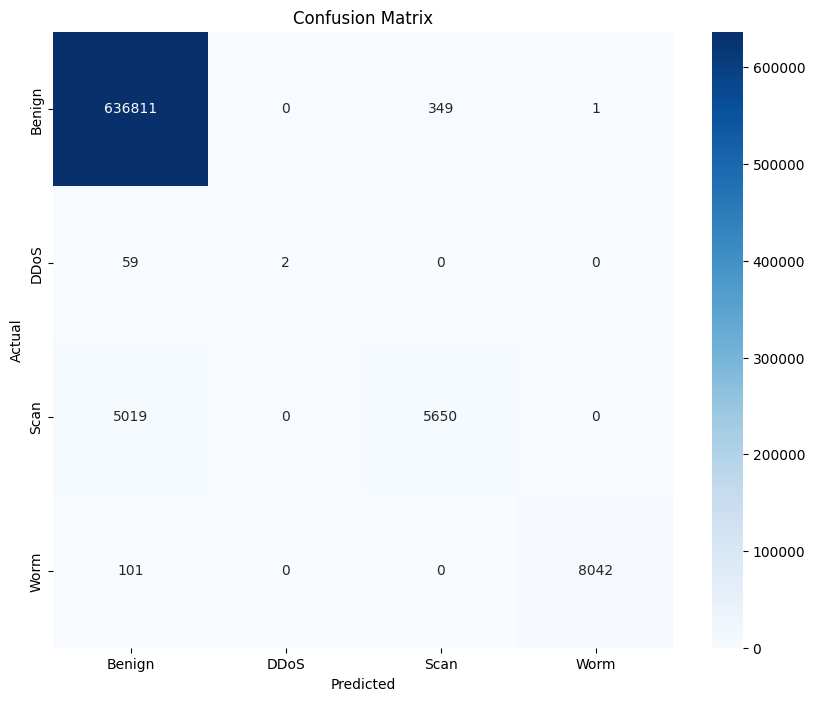

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

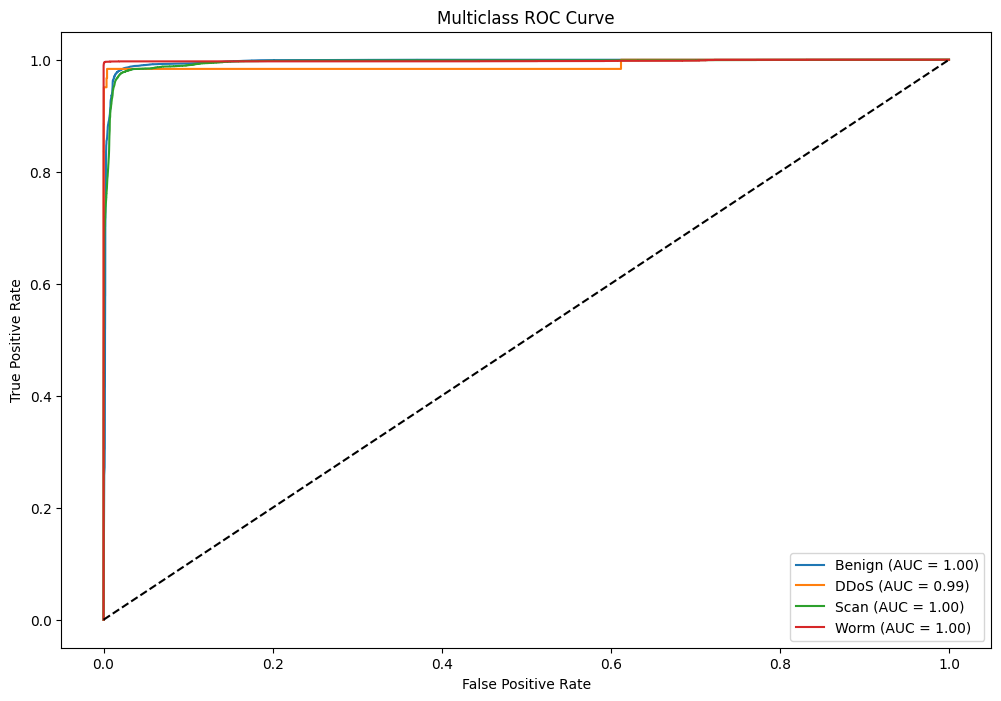

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, class_name in enumerate(unique_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

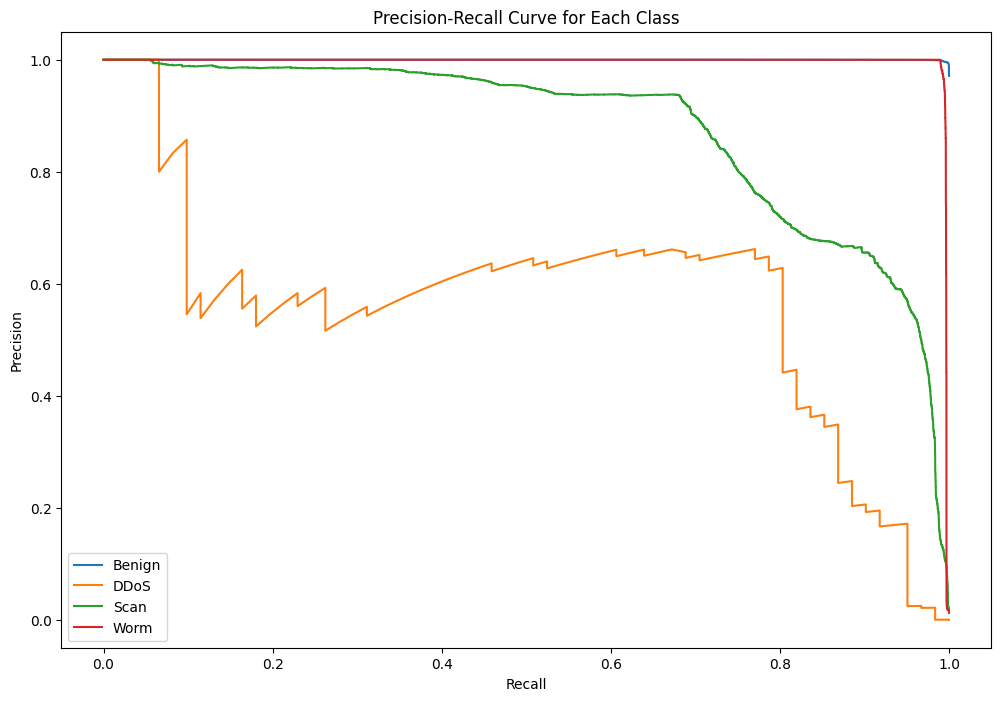

In [16]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))

for i, class_name in enumerate(unique_classes):
    precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'{class_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()